### Imports

In [1]:
from oak_cli.evaluation.addons.flops.graph_utils.imports import *

### Settings

In [2]:
VERBOSE = True

### Data Loading

In [3]:
#csv_dir = get_csv_dir_for_scenario(EvaluationScenario.FLOPS)
csv_dir = pathlib.Path("/home/alex/oakestra-cli/oak_cli/evaluation/addons/flops/csv/monolith_mnist_sklearn_small_without_baseimages")
#csv_dir = pathlib.Path("/home/alex/oakestra-cli/oak_cli/evaluation/addons/flops/csv/monolith_hierarchical_mnist_sklearn_small_without_baseimages")

csv_files = glob.glob(f'{csv_dir}/evaluation_run_*.csv')
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Add a numerical stage ID (instead of the string) for future numerical manipulations.
df[STAGE_ID_KEY]  =  df[STAGE_KEY].apply(lambda stage_name: EvaluationRunFLOpsProjectStage(stage_name).get_index())

#trained_model_df = pd.read_csv(TRAINED_MODEL_PERFORMANCE_CSV)
trained_model_df = pd.read_csv(csv_dir / "trained_models.csv")

# NOTE: The CSV "time-since-start" values are very precise, thus they differ (slightly) between Evaluation-Runs.
# This difference leads to issues when trying to plot them in an aggregated way.
# To fix this we cast the floats to ints instead. I.e. we are looking at whole seconds - which is fine for this concrete use-case.
df[[TIME_START_KEY]] = round(df[[TIME_START_KEY]].astype(int) / 60, ROUNDING_PRECISION)

df.set_index(TIME_START_KEY, inplace=True)

normalized_df = normalize_df_time_ranges(df)

singular_run_df = df[df[RUN_ID_KEY] == (df[RUN_ID_KEY].max() // 2)]

### Auxiliary

In [5]:
if VERBOSE:
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

### Common Graph Styling

In [6]:
sns.set_style("whitegrid")

---

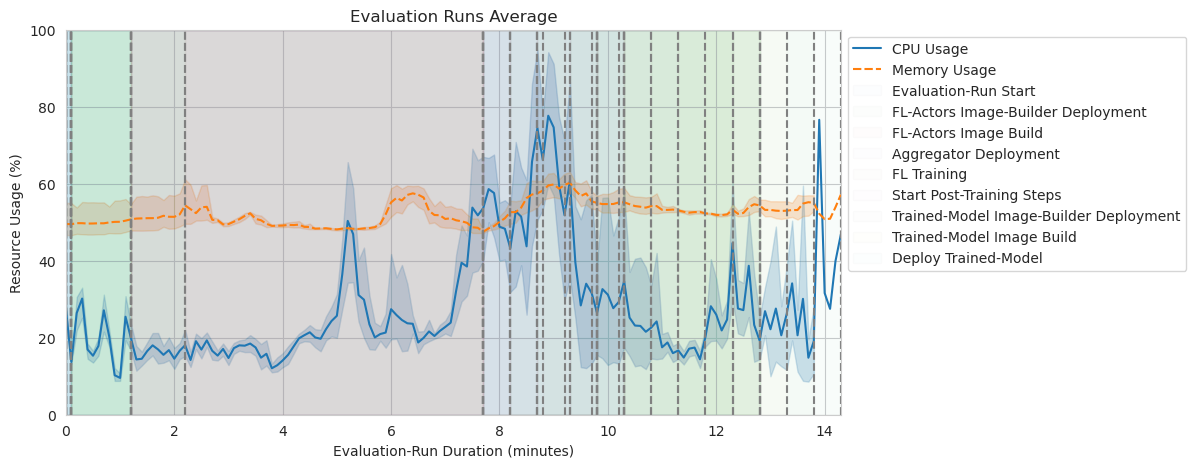

In [8]:
draw_graph(
    title="Evaluation Runs Average",
    data=df[[CPU_KEY, MEMORY_KEY, STAGE_KEY]],
    use_percentage_limits=True,
    y_label="Resource Usage (%)",
    show_stages=True,
    stages_color_intensity=0.01,
)

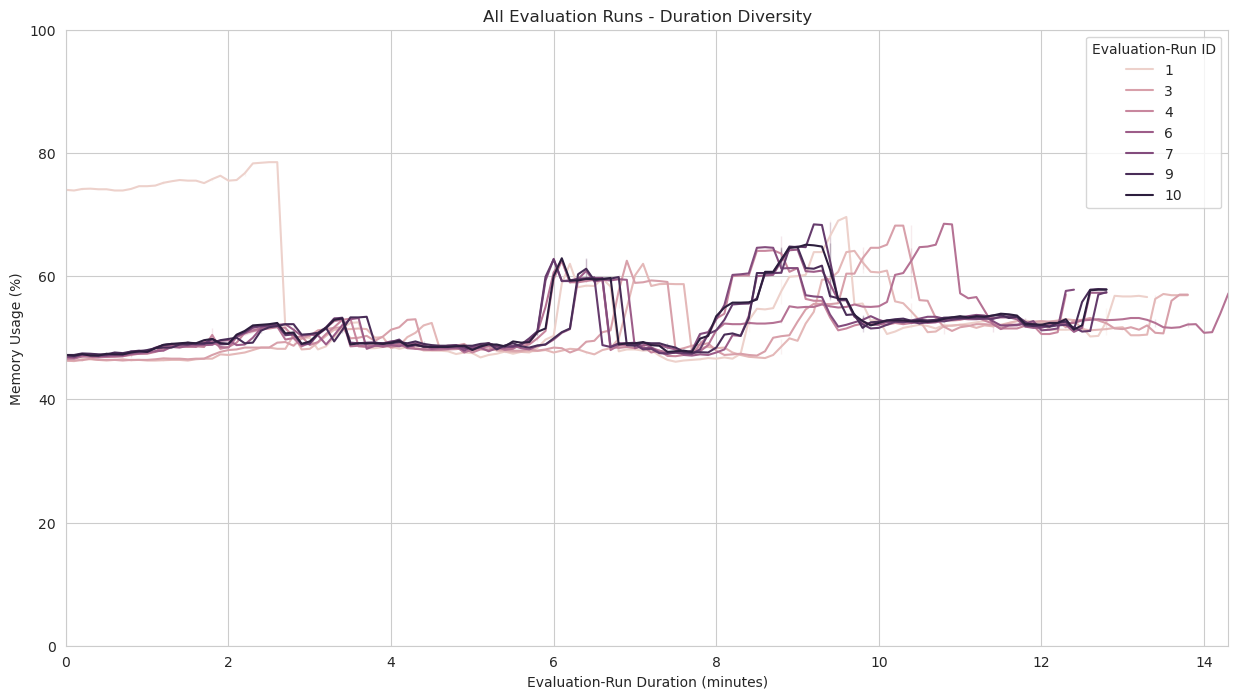

In [9]:
draw_line_graph_with_all_runs(
    data=df,
    y_label="Memory Usage (%)",
    key=MEMORY_KEY,
    )

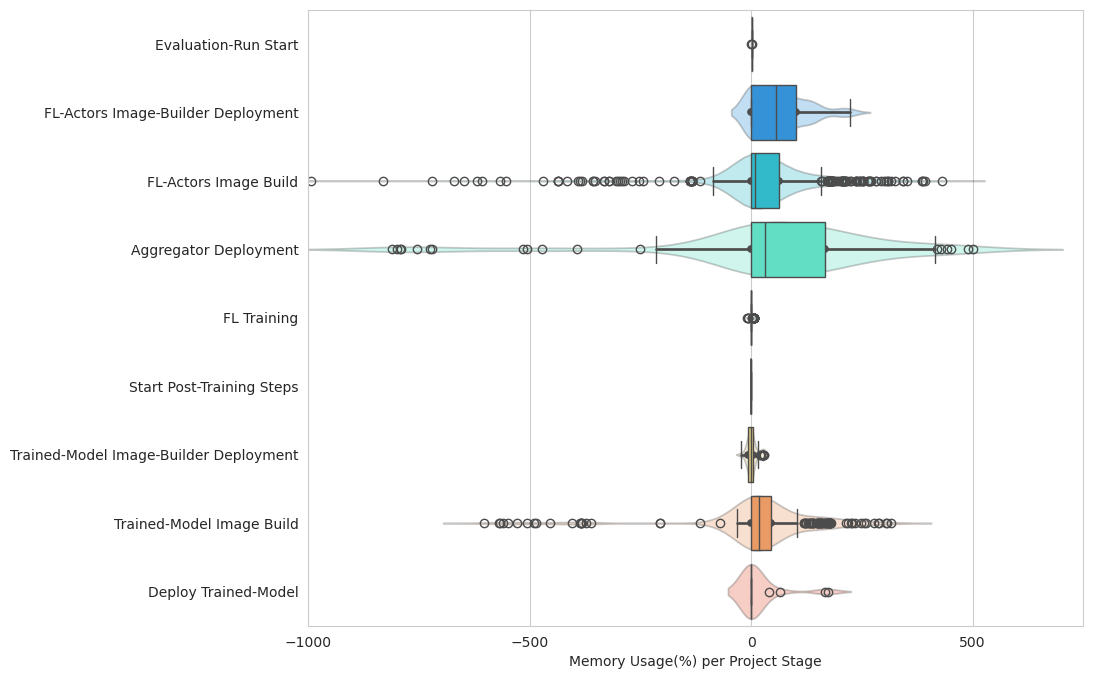

In [29]:
tttest_df = df.copy()
tttest_df[[DISK_LAST_KEY]] = round(tttest_df[[DISK_LAST_KEY]] / 5, 0)

draw_box_violin_plot_for_each_stage(
    data=tttest_df,
    key=DISK_LAST_KEY,
    x_label="Memory Usage(%) per Project Stage",
    #x_lim=(40,80),
    x_lim=(-1000, 750)
)

### Disk Space Changes

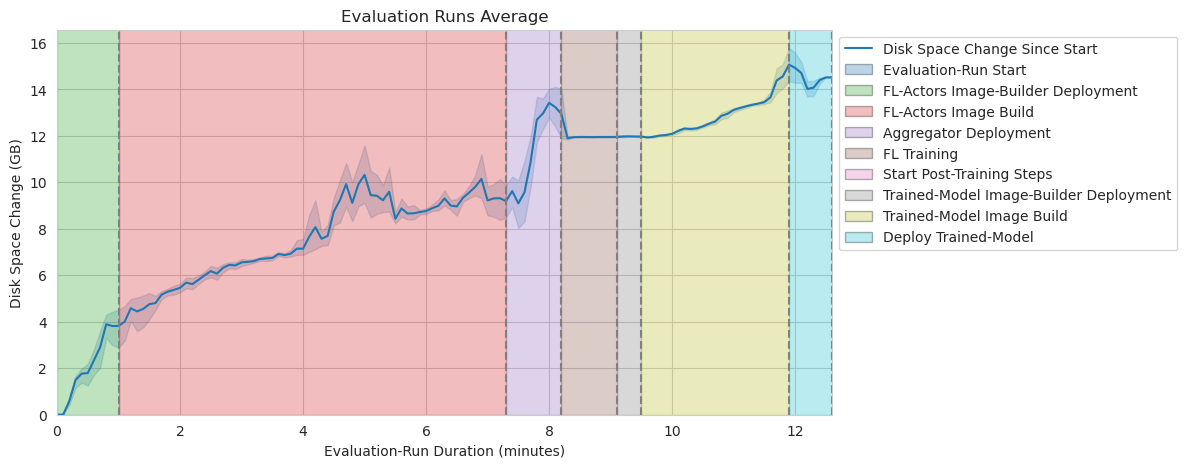

In [14]:
_normalized_df = normalized_df.copy()
_normalized_df[[DISK_START_KEY]] = _normalized_df[[DISK_START_KEY]] / 1024

draw_graph(
    title="Evaluation Runs Average",
    data=_normalized_df[[DISK_START_KEY, STAGE_KEY, RUN_ID_KEY]],
    plot_functions=[
        lambda: sns.lineplot(data=_normalized_df[[DISK_START_KEY, STAGE_KEY]])
    ],
    y_label="Disk Space Change (GB)",
    x_lim=(0, max(_normalized_df.index)),
    y_lim=0,
    show_stages=True,
    use_median_stages=True,
)

In [15]:
_test = singular_run_df.copy()

_test[["Disk MB/s"]] = round(_test[[DISK_LAST_KEY]] / 5, 1)
#_test[["Disk MB/s"]]

/tmp/ipykernel_375050/15640223.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


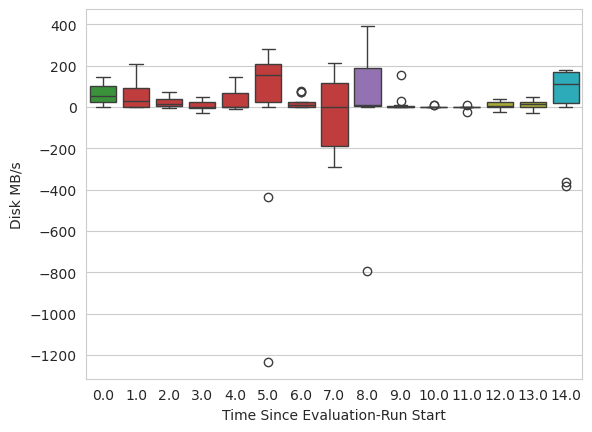

In [18]:
max_y = singular_run_df[DISK_LAST_KEY].max()
_test = singular_run_df.copy()
#_test[["Disk MB/s"]] = round(_test[[DISK_LAST_KEY]] / 5, 1)
_test[["Disk MB/s"]] = round(_test[[DISK_LAST_KEY]] / 5, 0)
# draw_graph(
#     size=(10,5),
#     title="Singular Example Evaluation Run",
#     #data=_test[["Disk MB/s", DISK_LAST_KEY, STAGE_KEY]],
#     data=_test[[CPU_KEY]],
#     plot_functions=[
#         lambda: sns.barplot(
#             #data=singular_run_df[[DISK_LAST_KEY, STAGE_KEY]],
#             #data=_test[["Disk MB/s"]],
#             # x=TIME_START_KEY,
#             data=_test[[CPU_KEY]],
#             x=TIME_START_KEY,
#             y=CPU_KEY
#             #y="Disk MB/s",
#         )
#     ],
#     y_label="Disk Space Change Between Measurements (MB)",
#     x_lim=(0, max(singular_run_df.index)),
#     # show_stages=True,
#     # stages_color_height=max_y,
#     #y_lim=(0, max_y)
#     #y_lim=(-1000, 1000)
# )

_test.reset_index(inplace=True)
#ic(_test[[TIME_START_KEY]])
#_test[[TIME_START_KEY]] = _test[(_test[TIME_START_KEY]*10) % 5 == 0 ]

# _test[[TIME_START_KEY]] = _test[[TIME_START_KEY]].apply(
#         lambda time: myround(time)
#     )

#_test[TIME_START_KEY] = _test[TIME_START_KEY].apply(myround)
_test[TIME_START_KEY] = round(_test[TIME_START_KEY])

#_test[TIME_START_KEY] = myround(_test[TIME_START_KEY])
#_test[[TIME_START_KEY]] = myround(_test[[TIME_START_KEY]])
#ic(_test[[TIME_START_KEY]])
#_test = _test[[TIME_START_KEY, CPU_KEY, STAGE_KEY]]
#_test[[TIME_START_KEY]] = pd.to_datetime(_test[[TIME_START_KEY]])
#_test = _test.groupby(pd.Grouper(key=TIME_START_KEY, freq="30s")).mean()
_test.set_index(TIME_START_KEY, inplace=True)
# sns.barplot(
#     #data=singular_run_df[[DISK_LAST_KEY, STAGE_KEY]],
#     #data=_test[["Disk MB/s"]],
#     # x=TIME_START_KEY,
#     data=_test[[CPU_KEY]],
#     x=TIME_START_KEY,
#     y=CPU_KEY
#     #y="Disk MB/s",
# )


# draw_graph(
#     size=(15,5),
#     title="Singular Example Evaluation Run",
#     #data=_test[["Disk MB/s", DISK_LAST_KEY, STAGE_KEY]],
#     data=_test[[CPU_KEY, STAGE_KEY]],
#     plot_functions=[
#         lambda: sns.barplot(
#             #data=singular_run_df[[DISK_LAST_KEY, STAGE_KEY]],
#             #data=_test[["Disk MB/s"]],
#             # x=TIME_START_KEY,
#             data=_test[[CPU_KEY, STAGE_KEY]],
#             x=TIME_START_KEY,
#             y=CPU_KEY,
#             #y="Disk MB/s",
#             #palette=PALETTE,
#             palette=pallete_dict,
#         )
#     ],
#     y_label="Disk Space Change Between Measurements (MB)",
#     #x_lim=(0, max(singular_run_df.index)),
#     #show_stages=True,
#     # stages_color_height=max_y,
#     #y_lim=(0, max_y)
#     #y_lim=(-1000, 1000)
# )

test_dict = {}
for i, row in _test.iterrows():
    color = my_dict[EvaluationRunFLOpsProjectStage(row[STAGE_KEY])]
    test_dict[str(i)] = color
    #ax.bar(i, row[CPU_KEY], color=color)

#ic(test_dict)
#ic(_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#sns.barplot(
sns.boxplot(
    #data=singular_run_df[[DISK_LAST_KEY, STAGE_KEY]],
    data=_test,
    #data=_test[["Disk MB/s"]],
    # x=TIME_START_KEY,
    #data=_test[[CPU_KEY, STAGE_KEY]],
    x=TIME_START_KEY,
    #y=CPU_KEY,
    y="Disk MB/s",
    palette=test_dict,
    ax=ax,
    #ci=None,
)

plt.show()

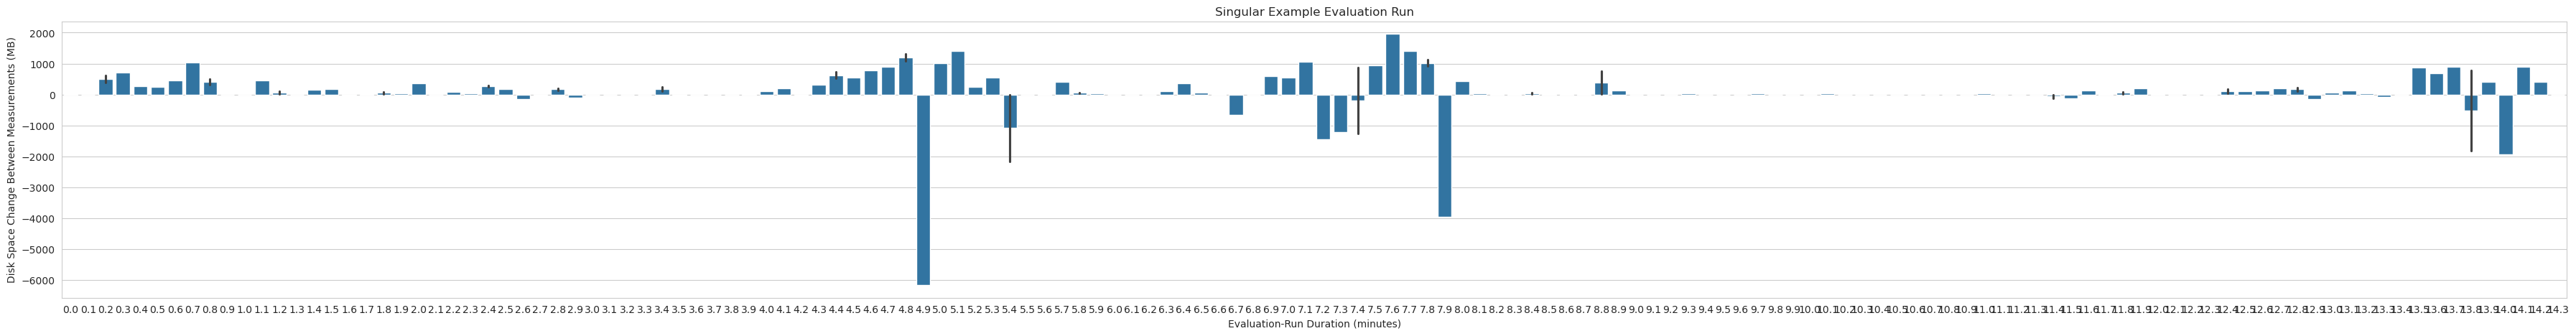

In [19]:

max_y = singular_run_df[DISK_LAST_KEY].max()
draw_graph(
    size=(45,5),
    title="Singular Example Evaluation Run",
    data=singular_run_df[[DISK_LAST_KEY, STAGE_KEY]],
    plot_functions=[
        lambda: sns.barplot(
            #data=singular_run_df[[DISK_LAST_KEY, STAGE_KEY]],
            data=singular_run_df[[DISK_LAST_KEY]],
            x=TIME_START_KEY,
            y=DISK_LAST_KEY
        )
    ],
    y_label="Disk Space Change Between Measurements (MB)",
    #x_lim=(0, max(singular_run_df.index)),
    # show_stages=True,
    # stages_color_height=max_y,
    #y_lim=(0, max_y)
    #y_lim=(-1000, 1000)
)



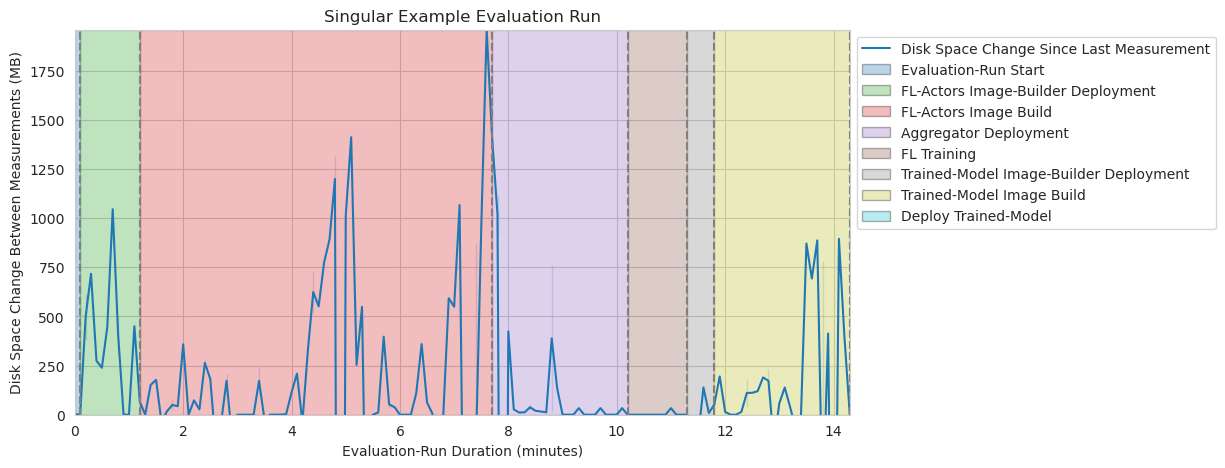

In [20]:

max_y = singular_run_df[DISK_LAST_KEY].max()
draw_graph(
    title="Singular Example Evaluation Run",
    data=singular_run_df[[DISK_LAST_KEY, STAGE_KEY]],
    y_label="Disk Space Change Between Measurements (MB)",
    x_lim=(0, max(singular_run_df.index)),
    show_stages=True,
    stages_color_height=max_y,
    y_lim=(0, max_y)
)

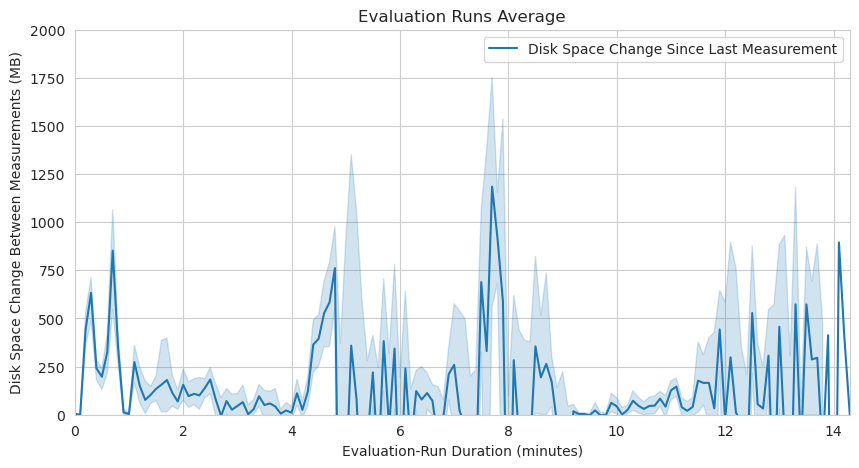

In [21]:
max_y = df[DISK_LAST_KEY].max()
draw_graph(
    title="Evaluation Runs Average",
    data=df[[DISK_LAST_KEY, STAGE_KEY]],
    y_label="Disk Space Change Between Measurements (MB)",
    x_lim=(0, max(df.index)),
    #y_lim=(0, max_y),
    y_lim=(0, 2000),
    #show_stages=True,
    #stages_color_intensity=0.01,
)

### Network

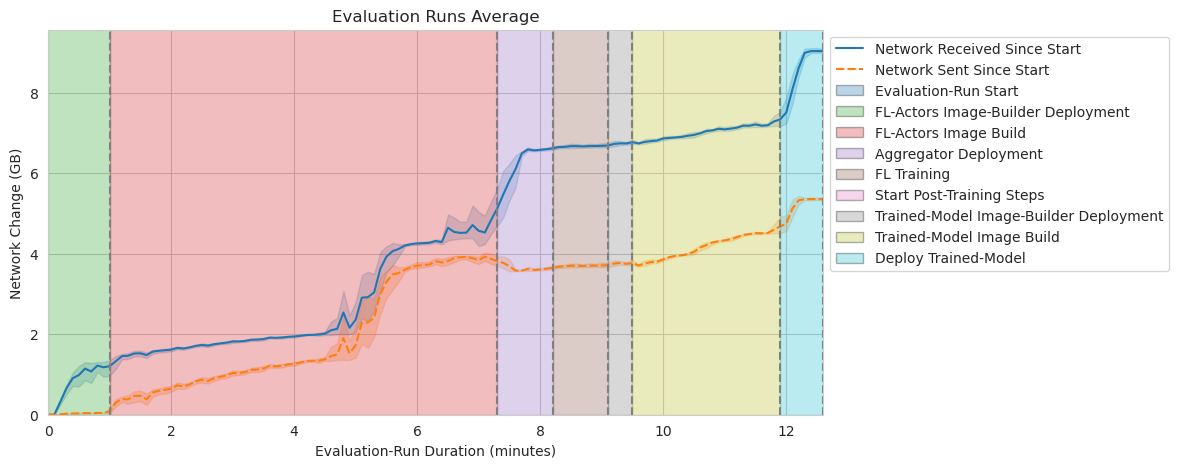

In [22]:
_normalized_df = normalized_df.copy()
_normalized_df[NETWORK_START_KEYS] = _normalized_df[NETWORK_START_KEYS] / 1024

draw_graph(
    title="Evaluation Runs Average",
    data=_normalized_df[NETWORK_START_KEYS + [STAGE_KEY, RUN_ID_KEY]],
    plot_functions=[
        lambda: sns.lineplot(data=_normalized_df[NETWORK_START_KEYS + [STAGE_KEY]])
    ],
    y_label="Network Change (GB)",
    x_lim=(0, max(_normalized_df.index)),
    y_lim=0,
    show_stages=True,
    use_median_stages=True,
)

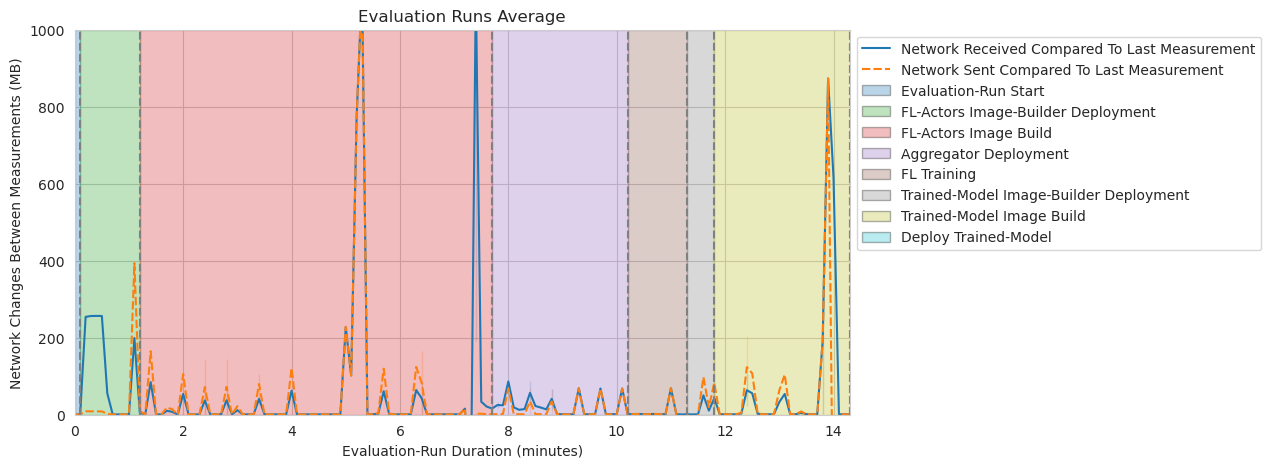

In [23]:
draw_graph(
    title="Evaluation Runs Average",
    data=singular_run_df[NETWORK_LAST_KEYS + [STAGE_KEY]],
    y_label="Network Changes Between Measurements (MB)",
    x_lim=(0, max(singular_run_df.index)),
    y_lim=(0, 1000),
    show_stages=True,
    stages_color_height=1000
)

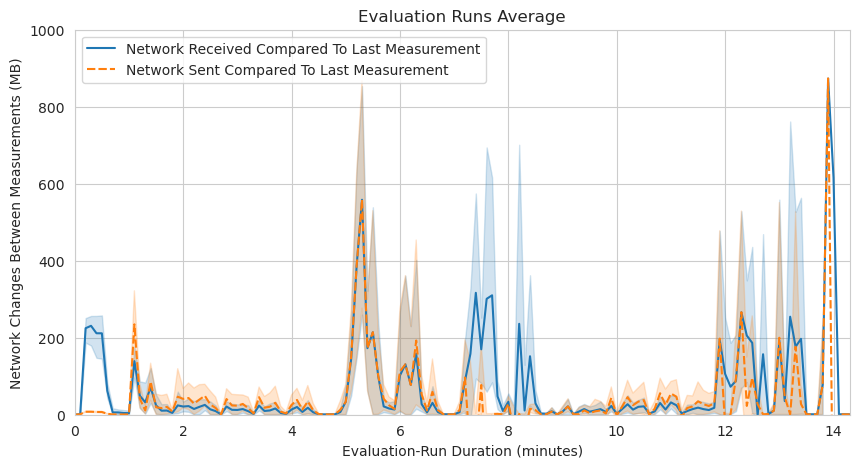

In [24]:
draw_graph(
    title="Evaluation Runs Average",
    data=df[NETWORK_LAST_KEYS + [STAGE_KEY]],
    y_label="Network Changes Between Measurements (MB)",
    x_lim=(0, max(df.index)),
    y_lim=(0, 1000),
    #show_stages=True,
    #stages_color_intensity=0.01,
)